# Topic: Regression: Cardiovascular Disease Prediction

## Introduction
One of the main causes of death worldwide is cardiovascular disease (CVD), and lowering the impact of these conditions depends on early risk factor identification. The dataset from the Framingham Heart Study offers important information about medical, behavioural, and demographic factors that can affect the 10-year risk of coronary heart disease (CHD). In order to find trends, patterns, and connections between the variables, this project will use exploratory data analysis (EDA) to examine and evaluate the dataset. Personalised care interventions and public health policies can benefit from an understanding of these aspects. This project will go further to build a predictive model for classifying if a person will have coronary heart disease (CHD) or not.

## Goal
The goal of this project is to perform exploratory data analysis (EDA) on the dataset to gain actionable insights into the risk factors associated with coronary heart disease (CHD) and also build a predictive model for classifying if a person will have coronary heart disease (CHD) or not.
***
### First, let's start by importing the necessary libraries and the dataset



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN


%matplotlib inline

Next, let's load the dataset and so some data inspection

In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
id                                                                       
0    64        2.0   F        YES         3.0     0.0                0   
1    36        4.0   M         NO         0.0     0.0                0   
2    46        1.0   F        YES        10.0     0.0                0   
3    50        1.0   M        YES        20.0     0.0                0   
4    64        1.0   F        YES        30.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
id                                                                             
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1              1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   

    TenYearCHD  
id              
0            1  
1            0  
2            0  
3            1  
4            0

In [3]:
data.shape

(3390, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [5]:
data.isnull().sum()


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
sum(data.isnull().sum())/data.shape[0] * 100

15.04424778761062

In [7]:
(data.isnull().sum()/data.shape[0])*100

age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

From our data inspection we found the following:

- The data has `3390` observations and `16` features.

- There are 14 numerical features `[float64(9), int64(5)]` and 2 categorical features `[object(2)]`

- There are a total of 510 cells (15%) with missing values from 7 features in the dataset `[education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose]`. These are numerical data, so we will look at their distribution to determine how to fill the missing values.

- Based on domain knowledge, we will be dropping the `education` because a person's education level is not a factor associated with them having coronary heart disease (CHD) or not



In [10]:
data.drop('education', axis=1, inplace=True)

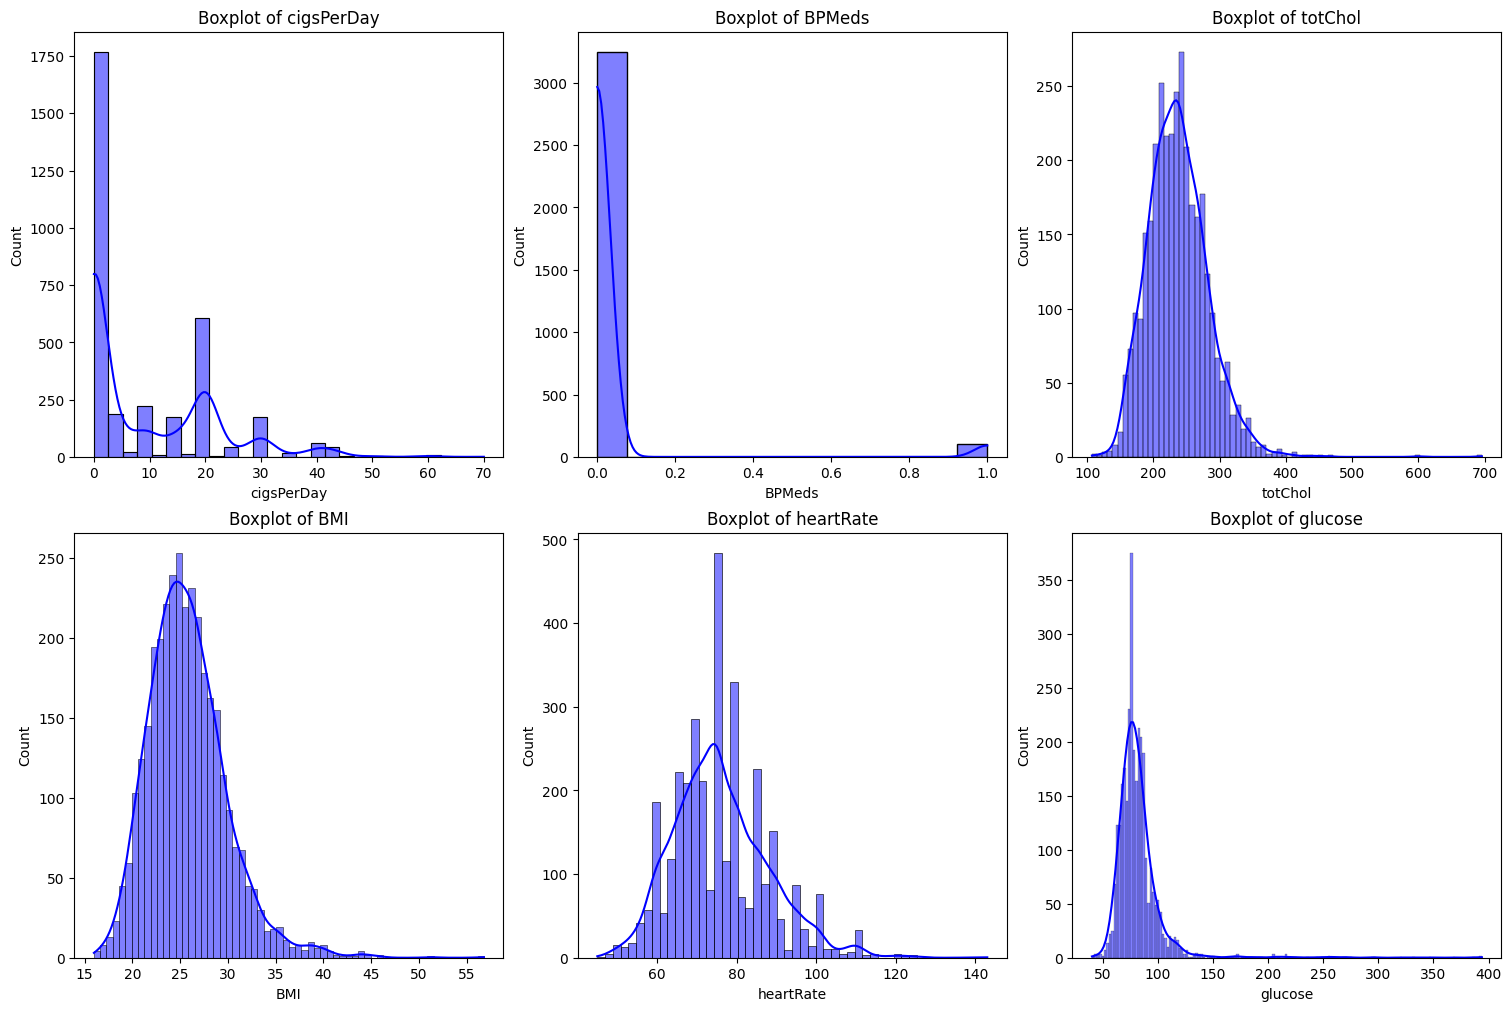

In [11]:
nan_col = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5 * 3, 10), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(nan_col):
    sns.histplot(data[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(nan_col), len(axes)):
    axes[j].set_visible(False)

plt.show()



While there is no perfect method to fill in missing values (the introduce new noice in the data), 510 cells are have missing values and we can't affored to lose all the rows with missing values at the moment.
This is how I plan to handle missing values using the measures of central tendency (Mean, Median, Mode):

- We intend to fill `Left-Skewed` or `Right-Skewed` distributed columns with the `median` value. This is because the median is less affected by extreme values (outliers) than the mean, making it a better representative for skewed distributions.

- We also intend to fill `Categorical-like Numerical` columns like the 'BPMeds' column with the `mode` because the mode represents the most frequent value, which can be meaningful in such cases.

In [12]:
for col in nan_col:
    if col != 'BPMeds':
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

In [13]:
data.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

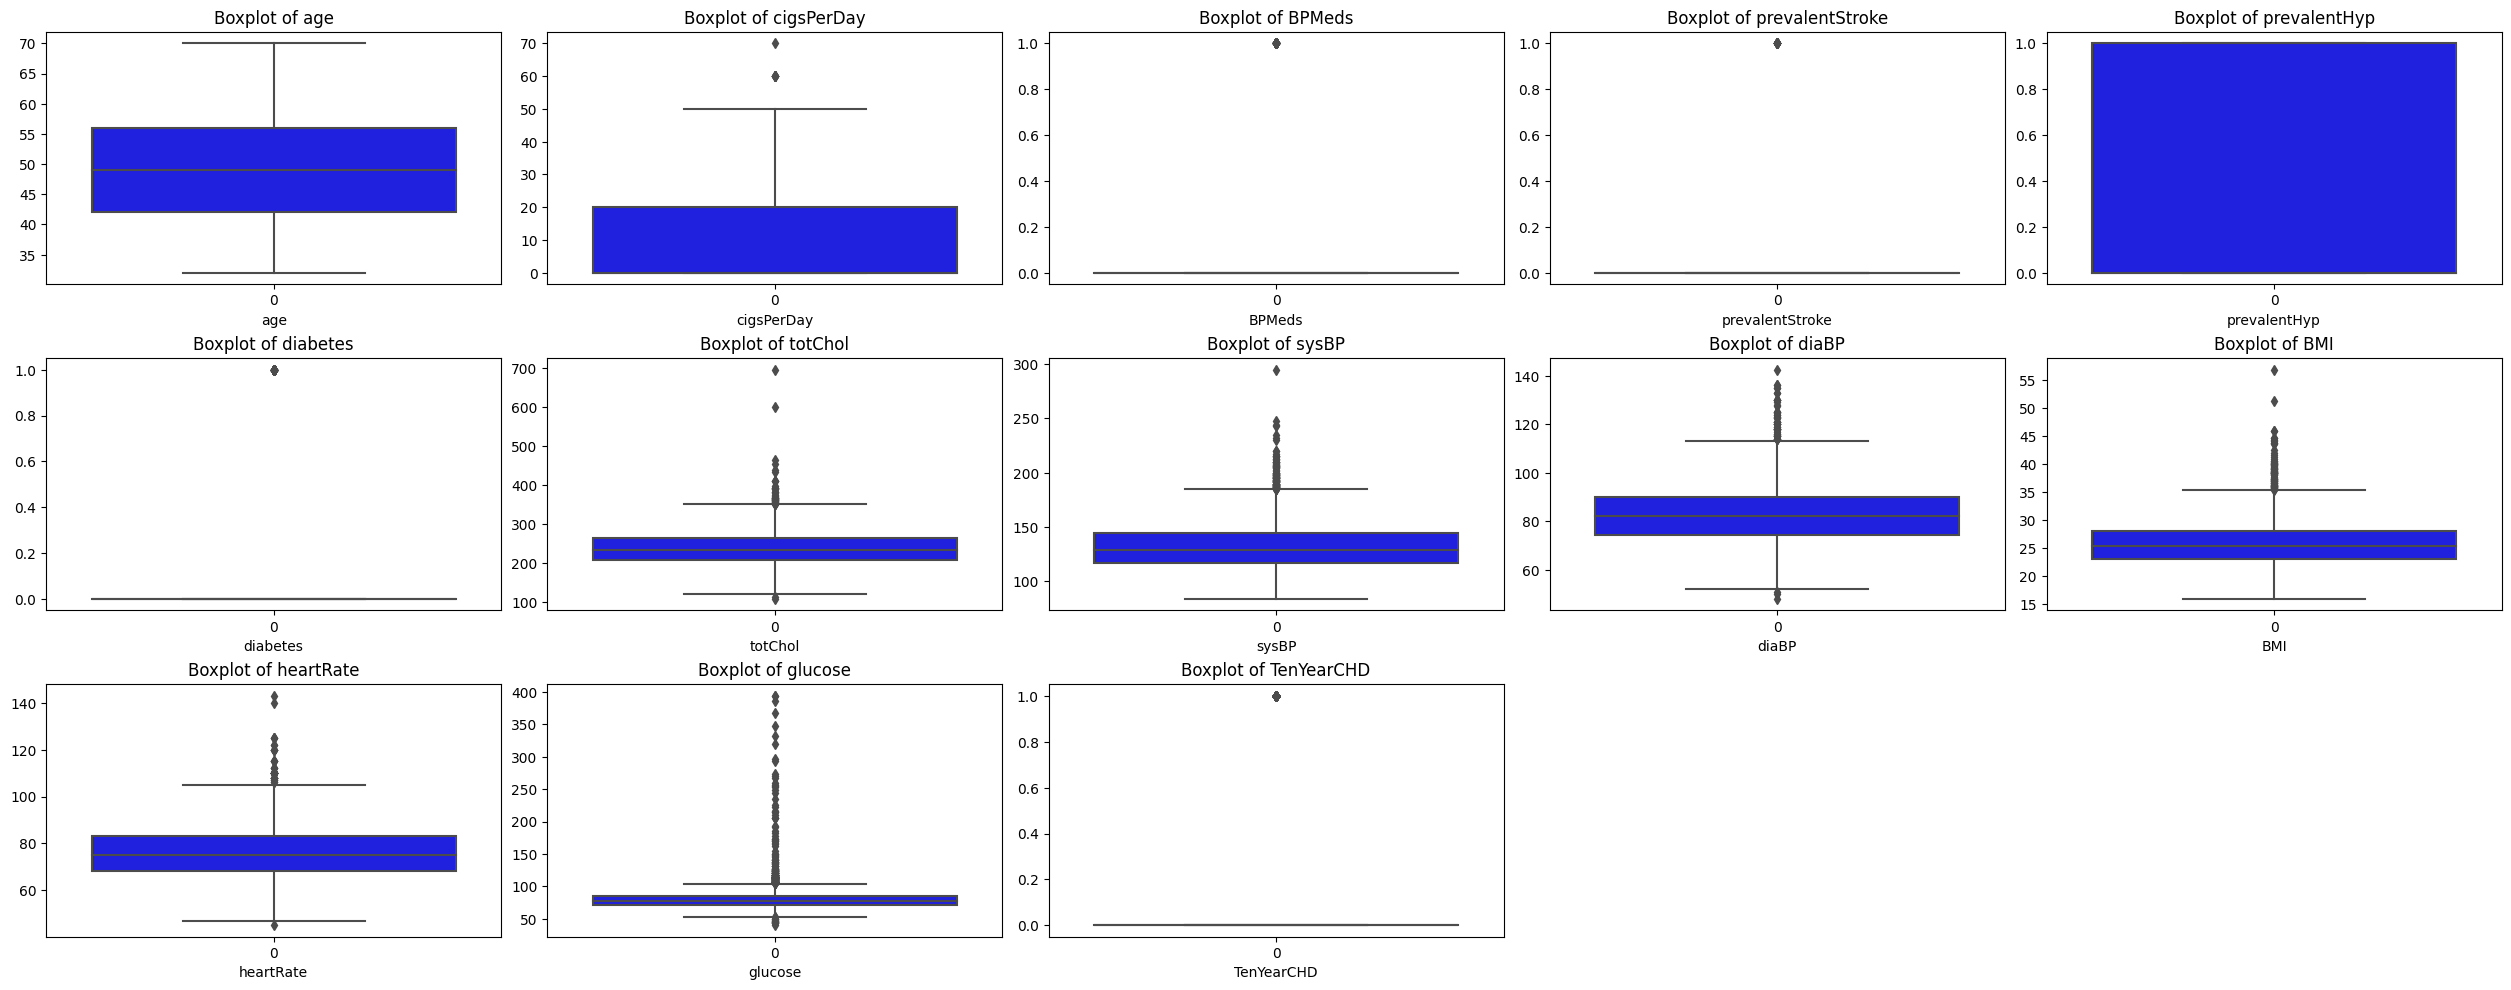

In [14]:
num_col = data.select_dtypes(include='number').columns

n_cols = (len(num_col) + 2) // 3

fig, axes = plt.subplots(nrows=5, ncols=n_cols, figsize=(5 * n_cols, 15), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(data[col], color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.show()

## Let's conduct some univariate analysis

We will do this by creating a boxplot of all numerial columns in the dataset

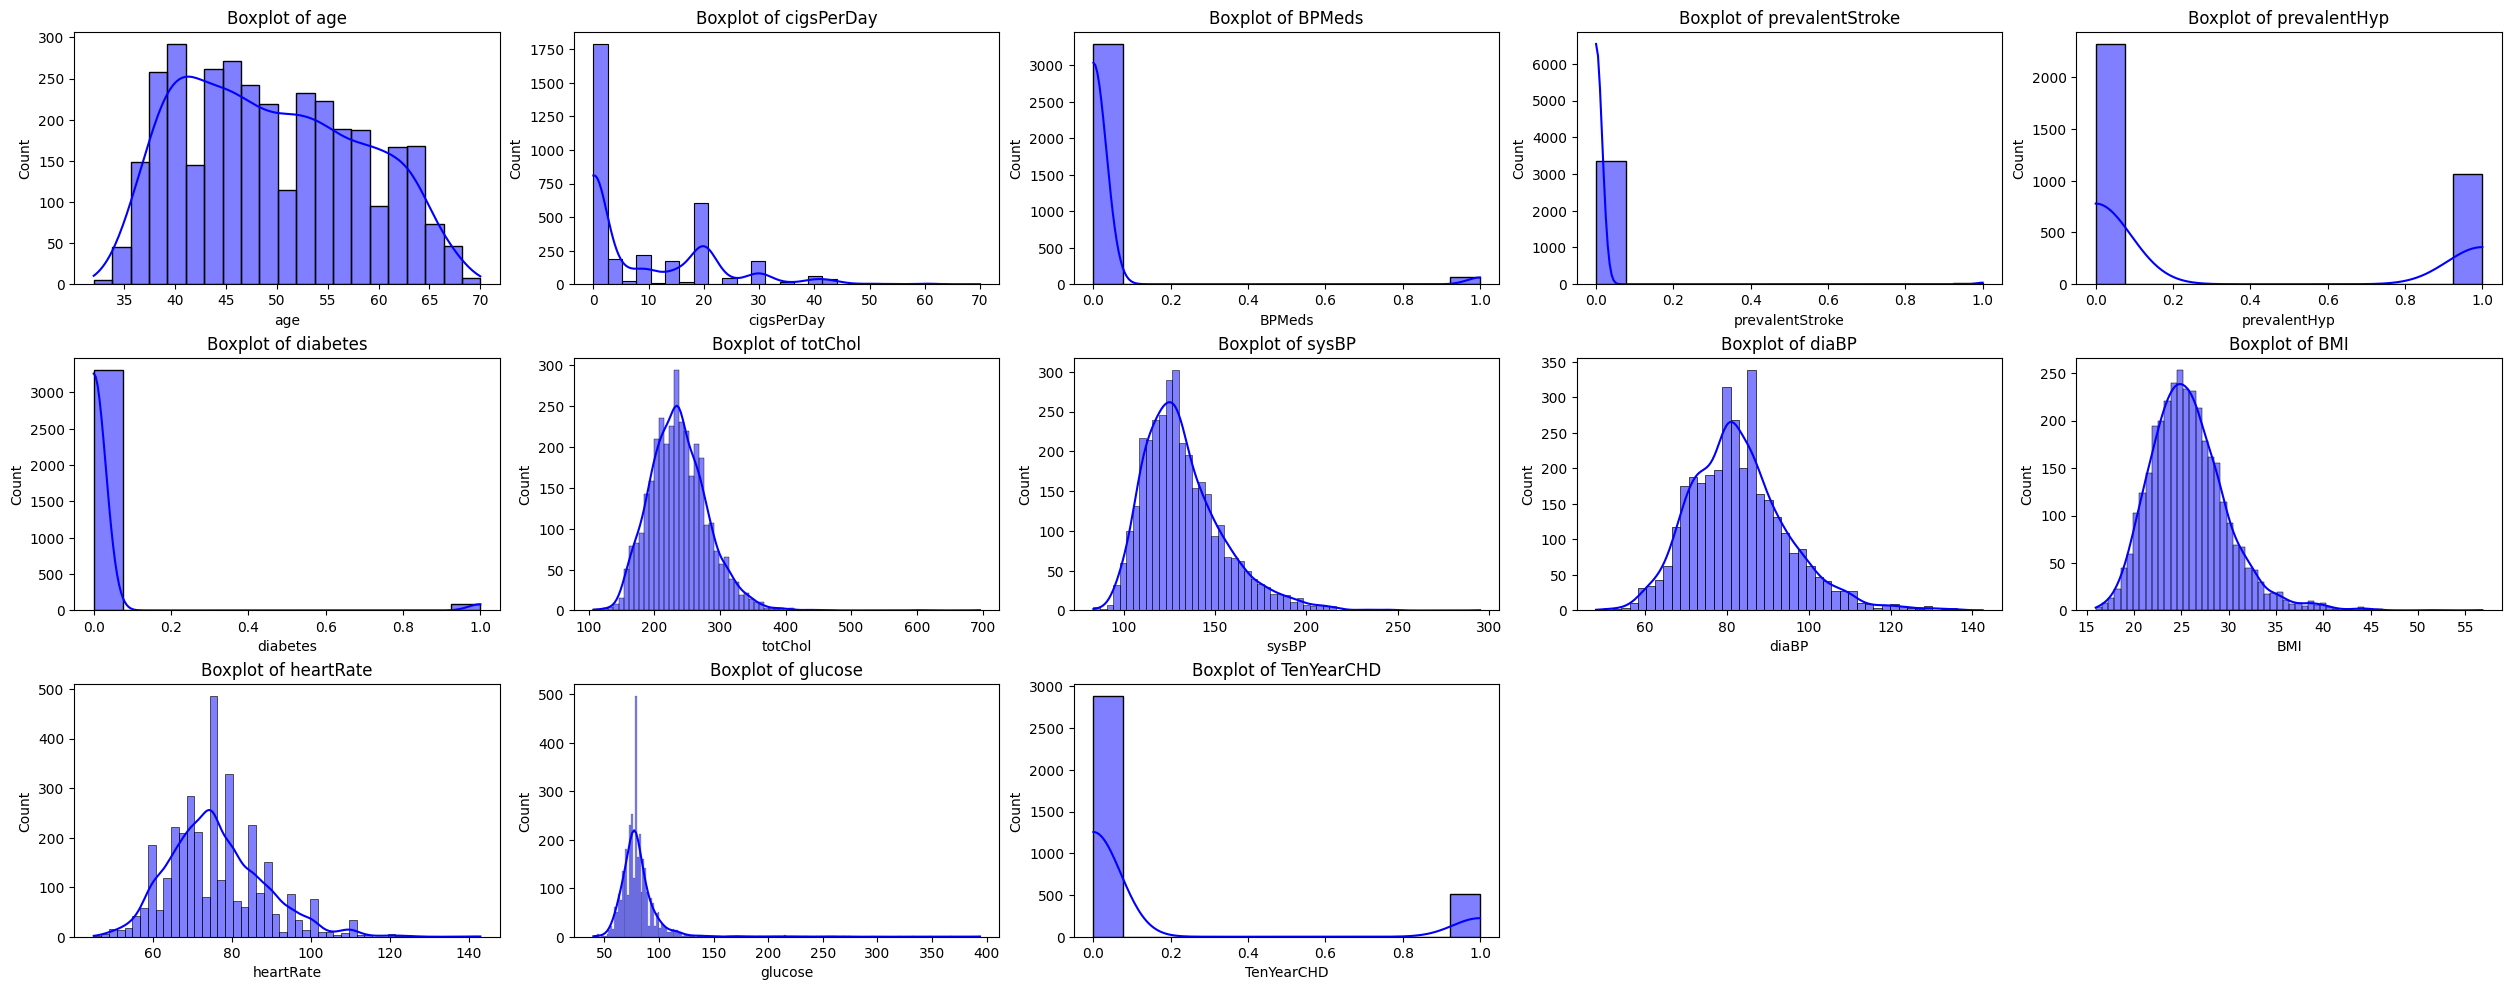

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=n_cols, figsize=(5 * n_cols, 15), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.show()

### Findings

1. **Age:** The age range from 32 (min) to 70 (max) years with the mean age being ~49.54 years, and a standard deviation (std) of ~8.59 years. The dataset primarily consists of middle-aged individuals, as shown by the mean and median (49 years). This aligns with the focus on long-term cardiovascular risks, which are often assessed for adults in this age group.

2. **Cigarettes**:  Range spans from 0 (non-smokers) to 70 cigarettes/day, most participants (25th percentile and median) report smoking 0 cigarettes per day, suggesting a large proportion of non-smokers. There’s a high variability in smoking habits, with some heavy smokers significantly skewing the data. Smoking is likely an important behavioral risk factor for CHD, we will look into it more.

3. **BPMeds**: Mean is ~0.03, indicating very few people in the dataset are on blood pressure medication (only ~3% of participants). The low percentage of participants on BP meds might mean that a large portion of the dataset comprises individuals without known hypertension, or those who manage blood pressure without medication.

4. **prevalentStroke:** Mean is ~0.006, indicating less than 1% of participants have experienced a stroke. The dataset contains very few individuals with a history of stroke, possibly reflecting the relatively young age of the population or the rarity of this condition in general.

5. **prevalentHyp:** Mean is ~0.31, meaning ~31% of participants have hypertension. Hypertension is common, affecting almost one-third of the participants. It is a significant risk factor for CHD.

6. **diabetes:** Mean is ~0.025, indicating only ~2.5% of participants have diabetes. Diabetes is relatively rare in this dataset, but it remains an important variable to analyze because of its known impact on CHD risk.

7. **totChol:** Cholesterol ranges from 107 to 696 mg/dL, with the middle 50% (IQR) falling between 206 and 264 mg/dL. The average cholesterol level (237 mg/dL) is slightly above the recommended range (<200 mg/dL), indicating a general trend of elevated cholesterol in this population.

8. **sysBP:** Values range from 83.5 to 295 mmHg, with the middle 50% (IQR) between 117 and 144 mmHg. The mean value (132.6 mmHg) is within the "elevated BP" range (>120 mmHg), suggesting that many participants may be at risk of hypertension or cardiovascular issues.<br><br>
<img src='hbp.jpg' height='500px' width='600px'>

9. **diaBP:** Range spans from 48 to 142.5 mmHg, and the middle 50% (IQR) lies between 74.5 and 90 mmHg. The mean diastolic BP (82.88 mmHg) is slightly elevated (>80 mmHg), further emphasizing that hypertension is a key concern in this population.

10. **BMI:** Range spans from 15.96 (underweight) to 56.8 (severely obese), with the middle 50% (IQR) between 23.03 and 28.0. The average BMI is slightly above the "normal" range (<25), indicating a trend toward being overweight in this population. Obesity is a well-known risk factor for CHD.<br><br>
![bmi.jpg](https://lirp.cdn-website.com/69c0b277/dms3rep/multi/opt/Body+Mass+Index+-+BMI+classification-640w.jpg)

11. **heartRate:** Range spans from 45 bpm (low resting rate) to 143 bpm (likely elevated during activity or stress). The average heart rate (~76 bpm) is within the normal resting range (60–100 bpm). Outliers at both ends could reflect specific health conditions or measurement anomalies.

12. **glucose:** Range spans from 45 bpm (low resting rate) to 143 bpm (likely elevated during activity or stress). The average heart rate (~76 bpm) is within the normal resting range (60–100 bpm). Outliers at both ends could reflect specific health conditions or measurement anomalies.

13. **TenYearCHD:** Mean is ~0.15, meaning 15% of participants are classified as having a 10-year risk of CHD. A minority of participants (15%) are at risk, which is consistent with the presence of elevated risk factors like hypertension and high cholesterol in the dataset.

In [16]:
data.TenYearCHD.value_counts()
# /data.shape[0] * 100

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [17]:
target_col = data.TenYearCHD.value_counts()

fig = px.bar(target_col, 
                   x=target_col.index, 
                   y=target_col.values, 
                   width=1000,
                   title='Distribution of TenYearCHD')
fig.show()

Now, there exists a fundamental problem with the target variable; it is highly imbalamced. With 85% of the data belonging to class 0 and the other 15% to class one.

In [18]:
data.is_smoking.value_counts()/data.shape[0] * 100

is_smoking
NO     50.235988
YES    49.764012
Name: count, dtype: float64

In [19]:
sex_col = data.sex.value_counts()

fig = px.bar(sex_col, 
                   x=sex_col.index, 
                   y=sex_col.values, 
                   width=1000,
                   title='Distribution of Sex')
fig.show()

We have  approximately 57% of the entire data as females while the other 43% are males.

In [20]:
smoke_col = data.is_smoking.value_counts()

fig = px.bar(smoke_col, 
                   x=smoke_col.index, 
                   y=smoke_col.values, 
                   width=1000,
                   title='Distribution of Smokers')
fig.show()

The ratio of smokers to non-smokers in the dataset is almost 50:50. we will see how this influence our target variable shortly.
***
## Next, let's do some Bivariate Analysis to futher understand our features

In [21]:
fig = px.scatter(data, x='sysBP', y='age',
                 color='sex',
                 trendline='ols',
                 title='Systolic Blood Pressure vs. Age',
                 labels={'sysBP': 'Systolic BP', 'age': 'Age'},
                #  hover_data=['title'],
                 width=1000)
fig.show()

From the scatter plot above, we see that there exist a positive correlation (based on the direction of the trend) between age and systolic blood pressure. Although the correlation is stronger with Females than the Males.

This means that an increase in age leads to an increase in systolic blood pressure. If these features also correlate with our target variable, they will be really good features for our predictive model.

In [22]:
fig = px.scatter(data, x='diaBP', y='age',
                 color='sex',
                 trendline='ols',
                 title='Diastolic Blood Pressure vs. Age',
                 labels={'diaBP': 'Diastolic BP', 'age': 'Age'},
                #  hover_data=['title'],
                 width=1000)
fig.show()

Similarly, from the scatter plot above, we see that there exist a positive correlation (based on the direction of the trend) between age and diastolic blood pressure (not as strong as that of the systolic). Although the correlation is stronger with Females than the Males.

This means that an increase in age leads to an increase in systolic blood pressure. If these features also correlate with our target variable, they will be really good features for our predictive model.

In [23]:
fig = px.scatter(data, x='TenYearCHD', y='sysBP',
                 color='sex',
                 trendline='ols',
                 title='Systolic Blood Pressure vs. Ten Year CHD',
                 labels={'sysBP': 'Systolic BP', 'TenYearCHD': 'CHD Risk'},
                #  hover_data=['title'],
                 width=1000)
fig.show()

In [24]:
fig_box = px.box(data, x='TenYearCHD', y='sysBP', 
                 color='TenYearCHD',
                 title='Systolic Blood Pressure vs. Ten Year CHD',
                 labels={'TenYearCHD': 'CHD Risk', 'sysBP': 'Systolic BP'}, 
                 width=1000)
fig_box.show()

The median and range of Systolic BP for people with TenYearCHD is higher than that of those without TenYearCHD. This tell use that the higher the Systolic BP of a person, the more likely for them to get TenYearCHD.

In [25]:
fig_box = px.box(data, x='TenYearCHD', y='cigsPerDay', 
                 color='TenYearCHD',
                 title='Cigarettes Per Day vs. Ten Year CHD',
                 labels={'TenYearCHD': 'CHD Risk', 'cigsPerDay': 'cigsPerDay'}, 
                 width=1000)
fig_box.show()

The median of cigsPerDay for people with TenYearCHD is higher than that of those without TenYearCHD. This tell use that the higher the cigsPerDay of a person, the more likely for them to get TenYearCHD.

In [26]:
fig_box = px.box(data, x='TenYearCHD', y='totChol', 
                 color='TenYearCHD',
                 title='Total Cholestrol vs. Ten Year CHD',
                 labels={'TenYearCHD': 'CHD Risk', 'totChol': 'totChol'}, 
                 width=1000)
fig_box.show()

Similarly, the median of totChol for people with TenYearCHD is slightly higher than that of those without TenYearCHD. This tell use that the higher the totChol of a person, the more likely for them to get TenYearCHD.

In [27]:
fig_box = px.box(data, x='TenYearCHD', y='BMI', 
                 color='TenYearCHD',
                 title='BMI vs. Ten Year CHD',
                 labels={'TenYearCHD': 'CHD Risk', 'BMI': 'BMI'}, 
                 width=1000)
fig_box.show()

Similarly, the median of BMI for people with TenYearCHD is slightly higher than that of those without TenYearCHD. This tell use that the higher the BMI of a person, the more likely for them to get TenYearCHD.

In [28]:
data.groupby(['is_smoking', 'TenYearCHD']).size().reset_index(name='count')

is_smoking  TenYearCHD  count
0         NO           0   1467
1         NO           1    236
2        YES           0   1412
3        YES           1    275

In [29]:
smoke_col = data.groupby(['is_smoking', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(smoke_col, x='is_smoking', y='count', 
    color='TenYearCHD', 
    title='Smoking Status vs. Ten Year CHD',
    labels={'is_smoking': 'Smoking Status', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

From the plot above, it seems is_smoking is not a feature that influences TenYearCHD because both smokers and non-smokers have the sam amount of CHD Risk.

In [30]:
BP_col = data.groupby(['BPMeds', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(BP_col, x='BPMeds', y='count', 
    color='TenYearCHD', 
    title='BP Medications vs. Ten Year CHD',
    labels={'BPMeds': 'BP Medications', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

There are very few persons in the data that are on BPMeds and the mass majority are not on BPMeds. There are more people at CHD risk from those that are not on medication.

In [31]:
diabetes_col = data.groupby(['diabetes', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(diabetes_col, x='diabetes', y='count', 
    color='TenYearCHD', 
    title='Diabetes Status vs. Ten Year CHD',
    labels={'diabetes': 'Diabetes Status', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

Similarly, there are very few persons in the data that are have Diabetes and the mass majority do not have Diabetes. There are more people at CHD risk from those that do not have diabetes.

In [32]:
hyp_col = data.groupby(['prevalentHyp', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(hyp_col, x='prevalentHyp', y='count', 
    color='TenYearCHD', 
    title='prevalentHyp Status vs. Ten Year CHD',
    labels={'prevalentHyp': 'prevalentHyp Status', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

Similarly, there are fewer persons in the data that are have prevalentHyp and the mass majority do not have prevalentHyp. There are more people at CHD risk (by 1) from those that do not have prevalentHyp.

In [33]:
stroke_col = data.groupby(['prevalentStroke', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(stroke_col, x='prevalentStroke', y='count', 
    color='TenYearCHD', 
    title='prevalentStroke Status vs. Ten Year CHD',
    labels={'prevalentStroke': 'Prevalent Stroke Status', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

Similarly, there are very few persons in the data that are have Prevalent Stroke and the mass majority do not have Prevalent Stroke. There are more people at CHD risk from those that do not have Prevalent Stroke.

In [34]:
sex_col = data.groupby(['sex', 'TenYearCHD']).size().reset_index(name='count')

fig_box = px.bar(sex_col, x='sex', y='count', 
    color='TenYearCHD', 
    title='Sex vs. Ten Year CHD',
    labels={'sex': 'Smoking Status', 'count': 'Count', 'TenYearCHD': 'CHD Risk'},
    width=1000
)

fig_box.show()

## Next, let's perform some Miltivariate Analysis
This will help inform our choice of features for training our model

c:\Users\SHOPINVERSE\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



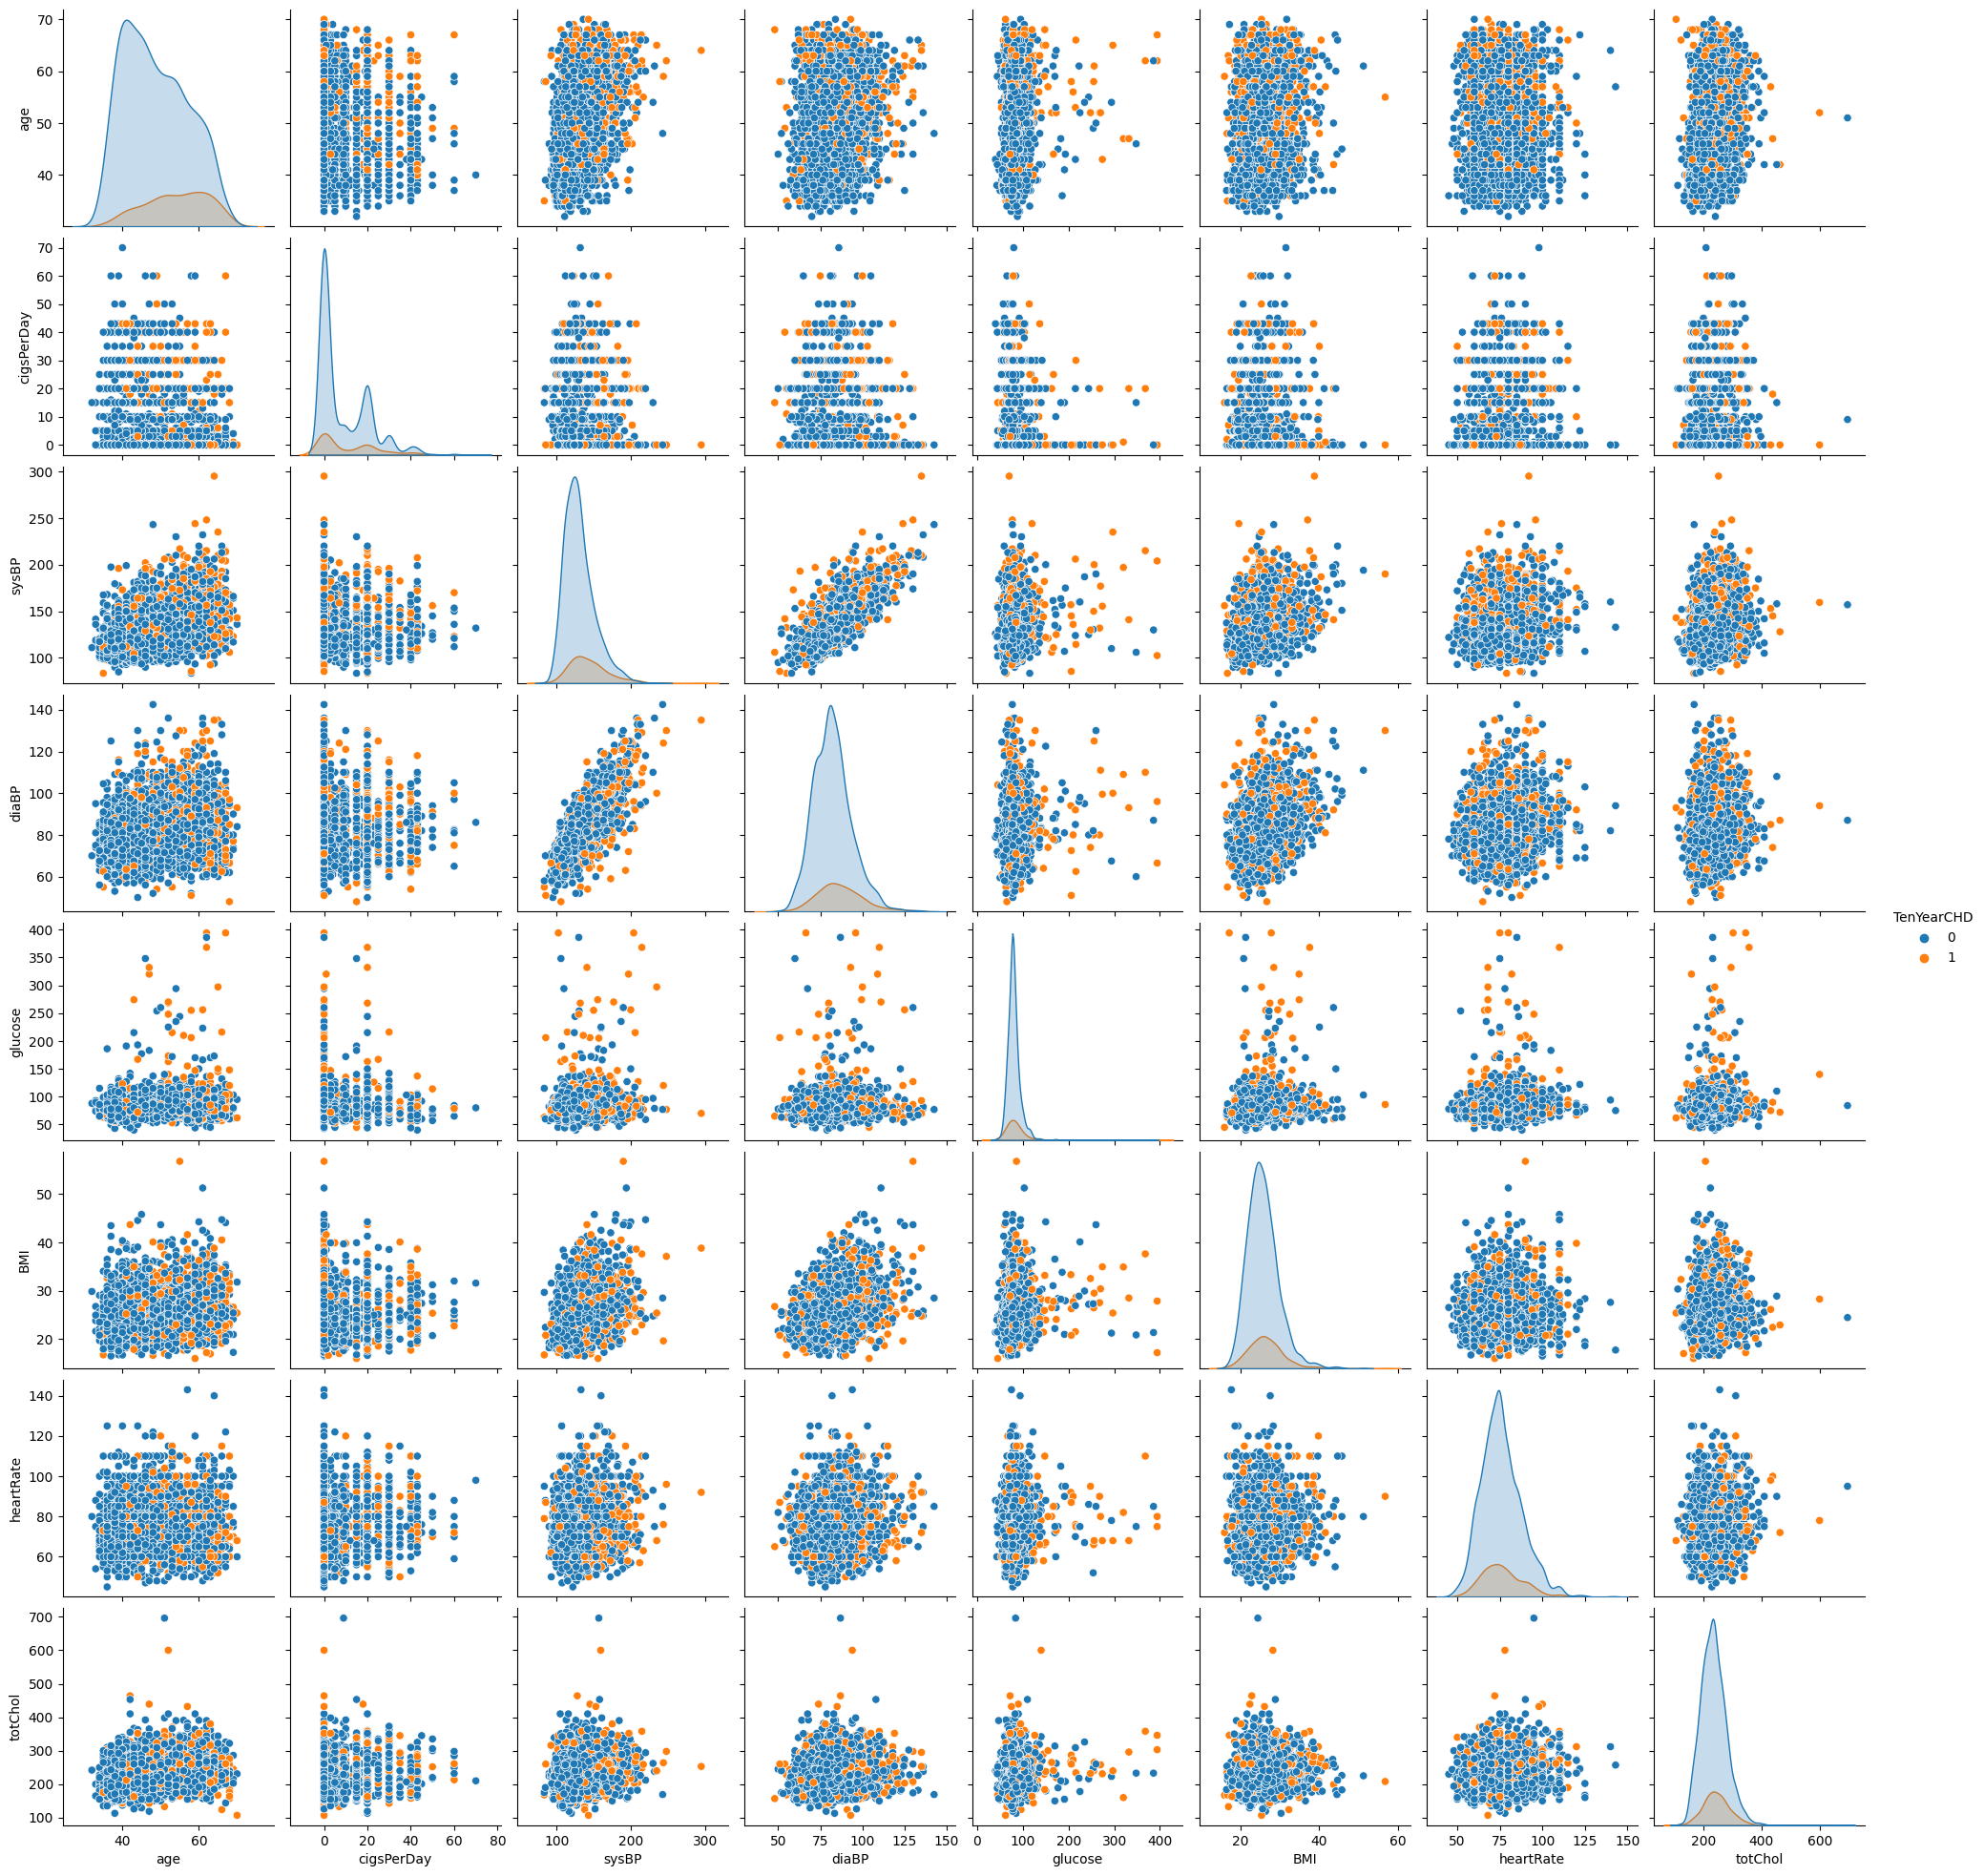

In [35]:
continuous_col = data[['age', 'cigsPerDay', 'sysBP', 'diaBP', 'glucose', 'BMI','heartRate', 'totChol', 'TenYearCHD']]

sns.pairplot(continuous_col, hue="TenYearCHD")
plt.show()

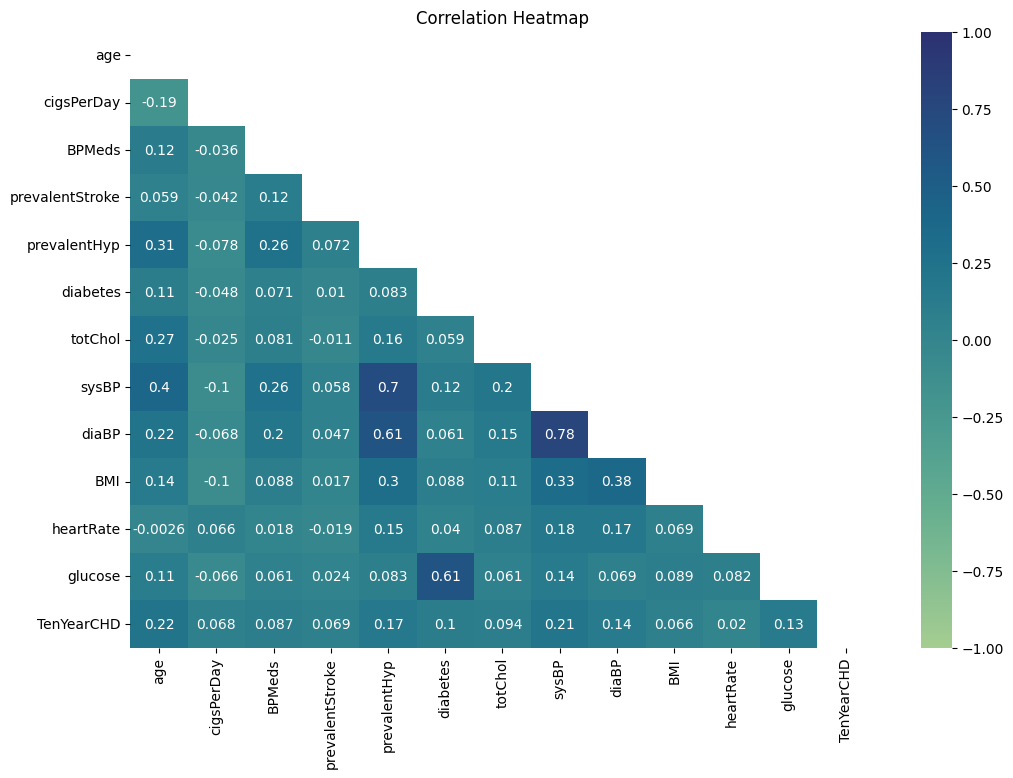

In [36]:
corr_data = data.select_dtypes(include='number')

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask = np.triu(corr_matrix), annot=True, cmap="crest", vmax=1.0, vmin=-1.0)
plt.title("Correlation Heatmap")
plt.show()

From the heatmap above we see that all the variables have very weak positive correlation with the target variable (TenYearCHD). But there are moderate to strong correlations between some other features:
- `['sysBP', 'diaBP']`

- `['prevalentHyp', 'sysBP', 'diaBP']`

- `['diabetes', 'glucose']`

These 5 variables `['prevalentHyp', 'sysBP', 'diaBP', 'diabetes', 'glucose']` also have the highest correlation coefficient with the target variable `['TenYearCHD]`
***
Before we make any conclusions, let's make further findings. When evaluating the correlation between variables, the method you choose depends on the nature of the variables (continuous or discrete). 

1. In cases where we have continuous variable `['age', 'cigsPerDay', 'sysBP', 'diaBP', 'glucose', 'BMI','heartRate', 'totChol']` vs. discrete target tariable `['TenYearCHD]`, a method like the Point Biserial Correlation can be used specifically. This method is a special case of Pearson correlation used when one variable is continuous and the other is binary as it measures the strength and direction of the association between the continuous variable and the discrete target variable.

2. In cases where we have discrete variable `['prevalentHyp', 'BPMeds', 'prevalentStroke', 'diabetes']` vs. discrete target variable `['TenYearCHD]`, a method like the Cramér's V can be utilized. Cramér's V is used to measure the strength of association between two categorical variables, including discrete ones. It is based on the Chi-Square statistic and ranges from 0 (no association) to 1 (perfect association).

The next thing is to implement these approach

In [37]:
continuous_col = data[['age', 'cigsPerDay', 'sysBP', 'diaBP', 'glucose', 'BMI','heartRate', 'totChol', 'TenYearCHD']]

result = {}

for col in continuous_col.columns:
    corr, p_value = pointbiserialr(continuous_col[col], continuous_col['TenYearCHD'])
    result[col] = {'Correlation': round(corr, 5), 'p-value': round(p_value, 5)}
    
pd.DataFrame(result)

age  cigsPerDay   sysBP    diaBP  glucose      BMI  \
Correlation  0.22493     0.06802  0.2127  0.13598  0.13347  0.06613   
p-value      0.00000     0.00007  0.0000  0.00000  0.00000  0.00012   

             heartRate  totChol  TenYearCHD  
Correlation    0.02017   0.0936         1.0  
p-value        0.24044   0.0000         0.0

The statistically significant p-values (< 0.05) for most variables suggest that the observed correlations are unlikely to be due to random chance, even if the relationships are weak in some cases.


- Age (0.22493) and systolic blood pressure (0.2127) show the strongest positive correlations with `TenYearCHD` among the variables. These are well-known risk factors for cardiovascular disease.

- Cigarettes per day (0.06802) and BMI (0.06613) have weak but statistically significant correlations, suggesting that smoking and obesity contribute to `TenYearCHD`, but other factors may have a larger influence.

- Glucose (0.13347) and total cholesterol (0.0936) are weakly correlated with `TenYearCHD`. However, systolic and diastolic blood pressure are more strongly correlated, highlighting their critical role in heart disease.

- Heart rate has a negligible correlation (0.02017) and is not statistically significant (p-value > 0.05), suggesting it may not play a major role in predicting `TenYearCHD` in this dataset.

Variables like age and systolic blood pressure could serve as key features in a predictive model for `TenYearCHD`, while others like heart rate may not contribute much.

In [38]:
discrete_col = data[['prevalentHyp', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']]

results = {}

for idx, col in enumerate(discrete_col.columns):
    contingency_table = pd.crosstab(discrete_col[col], discrete_col['TenYearCHD'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    results[col] = {'index': int(idx)+1, "Cramér's V": cramer_v}

pd.DataFrame(results)


prevalentHyp    BPMeds  prevalentStroke  diabetes  TenYearCHD
index           1.000000  2.000000         3.000000  4.000000    5.000000
Cramér's V      0.165657  0.084913         0.063493  0.101074    0.998848

- Prevalent Hypertension (prevalentHyp) has the strongest association (0.165657) among the tested predictors with `TenYearCHD`, although the association is still relatively weak. This highlights the importance of hypertension as a potential risk factor.

- Diabetes (0.101074) and Blood Pressure Medication (0.084913) show weaker associations. This could suggest that these factors alone are less predictive of CHD or that their effects may interact with other variables (e.g., age or BMI).

- Prevalent Stroke (0.063493) has the weakest association. While stroke is a serious condition, its low occurrence in the dataset likely reduces its measurable contribution to `TenYearCHD`.

- TenYearCHD (0.998848) shows a perfect association with itself, confirming the validity of the calculations.

While all tested variables are related to cardiovascular health, their individual association with `TenYearCHD` is generally weak. This indicates that `TenYearCHD` may result from the combined influence of multiple factors rather than any single variable.

The relatively low Cramér's V values suggest the need for multivariate analysis or feature engineering to uncover deeper patterns and interactions.



## Let's move to the Modeling  phase

First of all, we will select the best features for modeling based on the EDA. We will be selecting 11 columns for the modeling



In [39]:
selected_features = data[['prevalentHyp', 'sex', 'sysBP', 'diaBP', 'diabetes', 'age', 'BMI', 'totChol', 'cigsPerDay', 'glucose', 'TenYearCHD']]
selected_features.head()

prevalentHyp sex  sysBP  diaBP  diabetes  age    BMI  totChol  cigsPerDay  \
id                                                                              
0              0   F  148.0   85.0         0   64  25.38    221.0         3.0   
1              1   M  168.0   98.0         0   36  29.77    212.0         0.0   
2              0   F  116.0   71.0         0   46  20.35    250.0        10.0   
3              1   M  158.0   88.0         0   50  28.26    233.0        20.0   
4              0   F  136.5   85.0         0   64  26.42    241.0        30.0   

    glucose  TenYearCHD  
id                       
0      80.0           1  
1      75.0           0  
2      94.0           0  
3      94.0           1  
4      77.0           0

### We need to pre-process the data in preparation for modeling

we start by creating dummy variables for the `sex` column and then normalize the skewed continuous features

In [40]:
le = LabelEncoder()

selected_features['sex'] = le.fit_transform(selected_features['sex'])

selected_features.head()

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_17656\3563316292.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



prevalentHyp  sex  sysBP  diaBP  diabetes  age    BMI  totChol  \
id                                                                   
0              0    0  148.0   85.0         0   64  25.38    221.0   
1              1    1  168.0   98.0         0   36  29.77    212.0   
2              0    0  116.0   71.0         0   46  20.35    250.0   
3              1    1  158.0   88.0         0   50  28.26    233.0   
4              0    0  136.5   85.0         0   64  26.42    241.0   

    cigsPerDay  glucose  TenYearCHD  
id                                   
0          3.0     80.0           1  
1          0.0     75.0           0  
2         10.0     94.0           0  
3         20.0     94.0           1  
4         30.0     77.0           0

In [41]:
X = selected_features.drop(columns=['TenYearCHD'])
y = selected_features['TenYearCHD']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
model = LogisticRegression(random_state=24)

In [45]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=24)

In [46]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [47]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       576
           1       0.60      0.06      0.11       102

    accuracy                           0.85       678
   macro avg       0.73      0.53      0.51       678
weighted avg       0.82      0.85      0.80       678


Confusion Matrix:
 [[572   4]
 [ 96   6]]


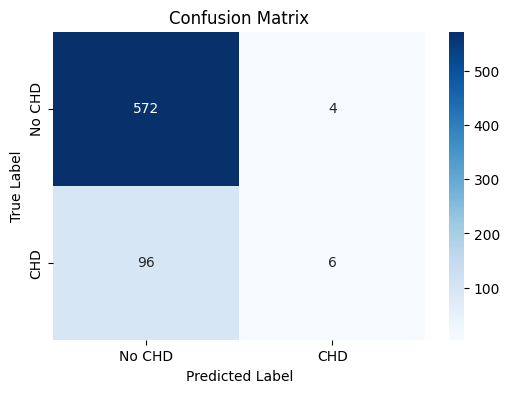

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix above, we see the effect of the unbalanced data as it is making the model biased.

To fix this issue, We make use of:

### Combine Oversampling and Undersampling
We can combine oversampling and undersampling techniques to create a balanced dataset with a mix of synthetic data and reduced majority samples. SMOTEENN and SMOTETomek are hybrid techniques that can get the job done.

In [49]:

smoteenn = SMOTEENN(random_state=24)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X, y)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=24)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(4149, 10)
(4149,)


In [50]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=24)

In [51]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[206 112]
 [ 64 448]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       318
           1       0.80      0.88      0.84       512

    accuracy                           0.79       830
   macro avg       0.78      0.76      0.77       830
weighted avg       0.79      0.79      0.78       830



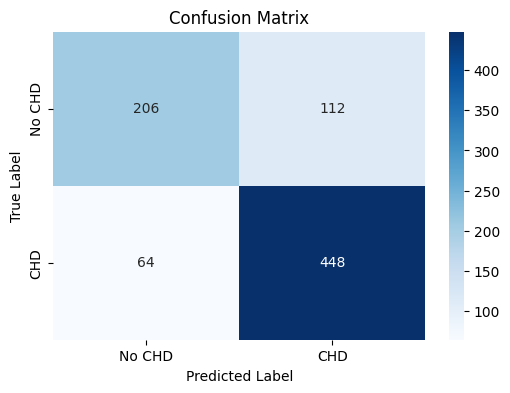

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Lets see how other algorithms  perform on this data

In [53]:
GBC = GradientBoostingClassifier(random_state=24)
GBC.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=24)

In [54]:
y_pred = GBC.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[235  83]
 [ 41 471]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       318
           1       0.85      0.92      0.88       512

    accuracy                           0.85       830
   macro avg       0.85      0.83      0.84       830
weighted avg       0.85      0.85      0.85       830



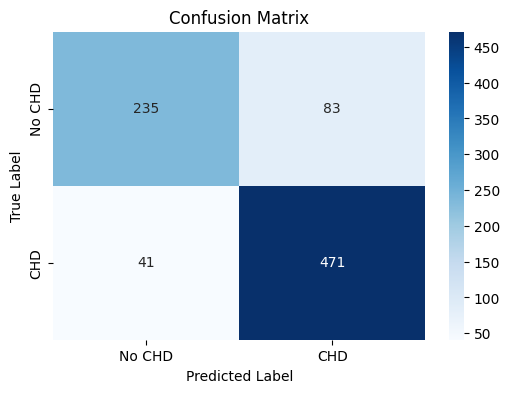

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This model performs better than the Logistics regression model

In [56]:
RFC = RandomForestClassifier(random_state=24)
RFC.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=24)

In [57]:
y_pred = RFC.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[266  52]
 [ 15 497]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       318
           1       0.91      0.97      0.94       512

    accuracy                           0.92       830
   macro avg       0.93      0.90      0.91       830
weighted avg       0.92      0.92      0.92       830



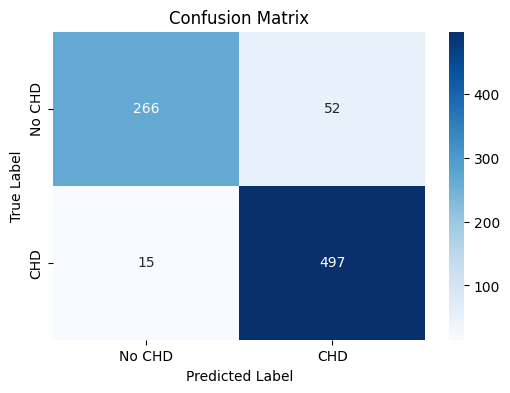

In [58]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This is the best performing model with an accuracy score of 92%. It was able to generalize on the test dataset, achiving a precision score of 95% on class 0 (No CHD) and 91% on class 1 (CHD). 


